<a href="https://www.kaggle.com/code/emrecavdar1565/seaborn-tutorial?scriptVersionId=109416453" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction
1. Read datas
1. Poverty rate of each state
1. Most common 15 Name or Surname of killed people
1. High school gradiuation rate of population that is older than 25 in states
1. Percentage of state's population according to races that are black, white, native american, asian and hispanic
1. High school graduation rate vs poverty rate of each state
1. Kill properties
    * Manner of death
    * Kill weapon
    * Age of killed people
    * Race of killed people
    * Most dangerous states
    * Having mental illness or not for killed people
    * Threat types
    * Flee types
    * Having body cameras or not for police
1. Race rates according to states in kill data
1. Kill numbers from states in kill data
<br>
<br>
Plot Contents:
* [Bar Plot](#1)
* [Point Plot](#2)
* [Joint Plot](#3)
* [Pie Chart](#4)
* [Lm Plot](#5)
* [Kde Plot](#6)
* [Violin Plot](#7)
* [Heatmap](#8)
* [Box Plot](#9)
* [Swarm Plot](#10)
* [Pair Plot](#11)
* [Count Plot](#12)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fatal-police-shootings-in-the-us/PercentagePeopleBelowPovertyLevel.csv
/kaggle/input/fatal-police-shootings-in-the-us/PoliceKillingsUS.csv
/kaggle/input/fatal-police-shootings-in-the-us/MedianHouseholdIncome2015.csv
/kaggle/input/fatal-police-shootings-in-the-us/PercentOver25CompletedHighSchool.csv
/kaggle/input/fatal-police-shootings-in-the-us/ShareRaceByCity.csv


In [2]:
# Read datas
median_house_hold_in_come = pd.read_csv('../input/fatal-police-shootings-in-the-us/MedianHouseholdIncome2015.csv', encoding = "windows-1252")
percentage_people_below_poverty_level = pd.read_csv('../input/fatal-police-shootings-in-the-us/PercentagePeopleBelowPovertyLevel.csv', encoding = "windows-1252")
percent_over_25_completed_highSchool = pd.read_csv('../input/fatal-police-shootings-in-the-us/PercentOver25CompletedHighSchool.csv',encoding = "windows-1252")
share_race_city = pd.read_csv('../input/fatal-police-shootings-in-the-us/ShareRaceByCity.csv', encoding = "windows-1252")
kill = pd.read_csv('../input/fatal-police-shootings-in-the-us/PoliceKillingsUS.csv', encoding = "windows-1252")

In [3]:
percentage_people_below_poverty_level.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [4]:
percentage_people_below_poverty_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [5]:
percentage_people_below_poverty_level.poverty_rate.value_counts()

0       1464
-        201
7.4      129
6.7      129
10.9     128
        ... 
73.5       1
92         1
73.8       1
55.9       1
83.6       1
Name: poverty_rate, Length: 771, dtype: int64

In [6]:
percentage_people_below_poverty_level['Geographic Area'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

<a id="1"></a>
## Bar Plot

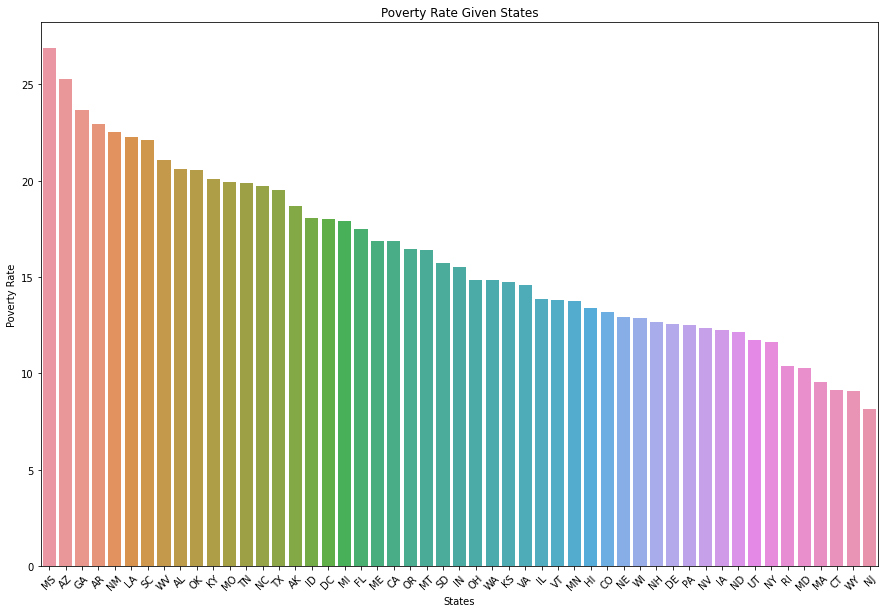

In [7]:
percentage_people_below_poverty_level.poverty_rate.replace(['-'],0.0,inplace = True)
percentage_people_below_poverty_level.poverty_rate = percentage_people_below_poverty_level.poverty_rate.astype(float)
area_list = list(percentage_people_below_poverty_level['Geographic Area'].unique())
area_poverty_ratio = []
for i in area_list:
    x = percentage_people_below_poverty_level[percentage_people_below_poverty_level['Geographic Area'] == i]
    area_poverty_rate = sum(x.poverty_rate)/len(x)
    area_poverty_ratio.append(area_poverty_rate)
data = pd.DataFrame({'area_list': area_list, 'area_poverty_ratio': area_poverty_ratio})
new_index = (data['area_poverty_ratio'].sort_values(ascending = False)).index.values
sorted_data = data.reindex(new_index)

# visualization
plt.figure(figsize = (15, 10))
sns.barplot(x = sorted_data['area_list'], y = sorted_data['area_poverty_ratio'])
plt.xticks(rotation = 45)
plt.xlabel('States')
plt.ylabel('Poverty Rate')
plt.title('Poverty Rate Given States')
plt.show()

In [8]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [9]:
kill.name.value_counts()

TK TK              49
Michael Johnson     2
Brandon Jones       2
Eric Harris         2
Michael Brown       2
                   ..
Jack Yantis         1
James Covington     1
Jeremy Mardis       1
Joseph Tyndall      1
Dwayne Jeune        1
Name: name, Length: 2481, dtype: int64

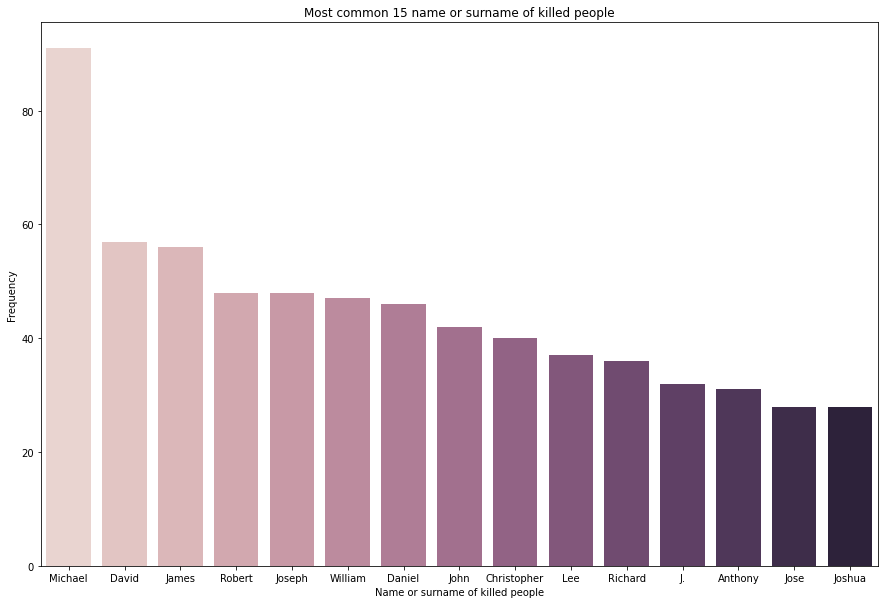

In [10]:
# Most common 15 name or surname of killed people
separate = kill.name[kill.name != 'TK TK'].str.split()
a, b = zip(*separate)
name_list = a + b
name_count = Counter(name_list)
most_common_names = name_count.most_common(15)
x,y = zip(*most_common_names)
x, y = list(x), list(y)

# visualization
plt.figure(figsize = (15,10))
sns.barplot(x = x, y = y, palette = sns.cubehelix_palette(len(x)))
plt.xlabel('Name or surname of killed people')
plt.ylabel('Frequency')
plt.title('Most common 15 name or surname of killed people')
plt.show()

In [11]:
percent_over_25_completed_highSchool.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [12]:
percent_over_25_completed_highSchool.percent_completed_hs.value_counts()

100     1301
-        197
91.7     170
92.9     169
92.5     168
        ... 
39.3       1
20.1       1
27.2       1
36.8       1
43.9       1
Name: percent_completed_hs, Length: 728, dtype: int64

In [13]:
percent_over_25_completed_highSchool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


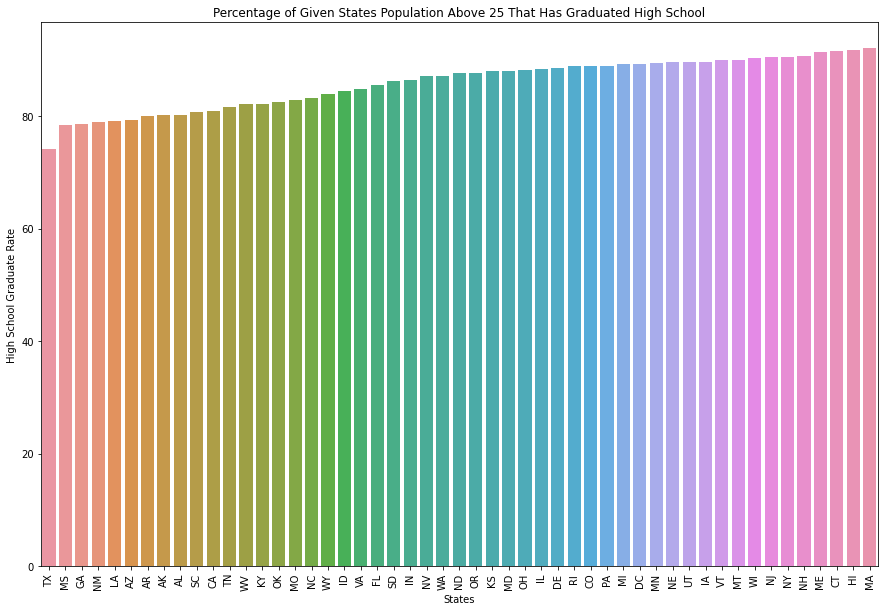

In [14]:
# High school graduation rate of the population that is older than 25 in states
percent_over_25_completed_highSchool.percent_completed_hs.replace(['-'], 0.0, inplace = True)
percent_over_25_completed_highSchool.percent_completed_hs = percent_over_25_completed_highSchool.percent_completed_hs.astype(float)
area_list = list(percent_over_25_completed_highSchool['Geographic Area'].unique())
area_highschool = []
for i in area_list:
    x = percent_over_25_completed_highSchool[percent_over_25_completed_highSchool['Geographic Area'] == i]
    area_highschool_rate = sum(x.percent_completed_hs)/len(x)
    area_highschool.append(area_highschool_rate)

# sorting
data = pd.DataFrame({'area_list': area_list, 'area_highschool_ratio': area_highschool})
new_index = (data['area_highschool_ratio'].sort_values(ascending = True)).index.values
sorted_data2 = data.reindex(new_index)

#visualization
plt.figure(figsize=(15,10))
sns.barplot(x = sorted_data2['area_list'], y = sorted_data2['area_highschool_ratio'])
plt.xticks(rotation = 90)
plt.xlabel('States')
plt.ylabel('High School Graduate Rate')
plt.title("Percentage of Given States Population Above 25 That Has Graduated High School")
plt.show()

In [15]:
share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [16]:
share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


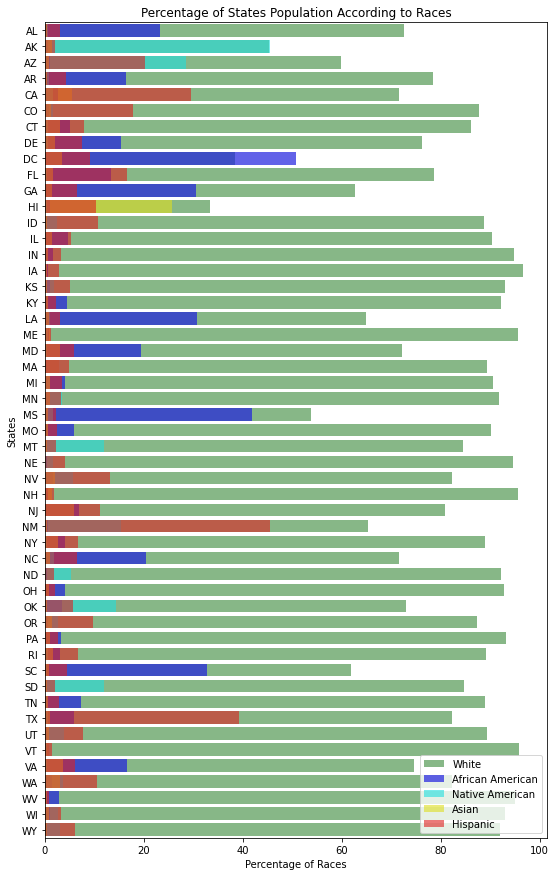

In [17]:
share_race_city.replace(['-'], 0.0, inplace = True)
share_race_city.replace(['(X)'], 0.0, inplace = True)
share_race_city.loc[:,['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']] = share_race_city.loc[:,['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']].astype(float)
area_list = list(share_race_city['Geographic area'].unique())
share_white = []
share_black = []
share_native_american = []
share_asian = []
share_hispanic = []
for i in area_list:
    x = share_race_city[share_race_city['Geographic area'] == i]
    share_white.append(sum(x.share_white)/len(x))
    share_black.append(sum(x.share_black)/len(x))
    share_native_american.append(sum(x.share_native_american)/len(x))
    share_asian.append(sum(x.share_asian)/len(x))
    share_hispanic.append(sum(x.share_hispanic)/len(x))
    
# visualization
f, ax = plt.subplots(figsize = (9,15))
sns.barplot(x = share_white, y = area_list, color = 'green', alpha = 0.5, label = 'White')
sns.barplot(x = share_black, y = area_list, color = 'blue', alpha = 0.7, label = 'African American')
sns.barplot(x = share_native_american, y = area_list, color = 'cyan', alpha = 0.6, label = 'Native American')
sns.barplot(x = share_asian, y = area_list, color = 'yellow', alpha = 0.6, label = 'Asian')
sns.barplot(x = share_hispanic, y = area_list, color = 'red', alpha = 0.6, label = 'Hispanic')

ax.legend(loc = 'lower right', frameon = True)    # legend
ax.set(xlabel = 'Percentage of Races', ylabel = 'States', title = 'Percentage of States Population According to Races')
plt.show()

<a id="2"></a>
## Point Plot

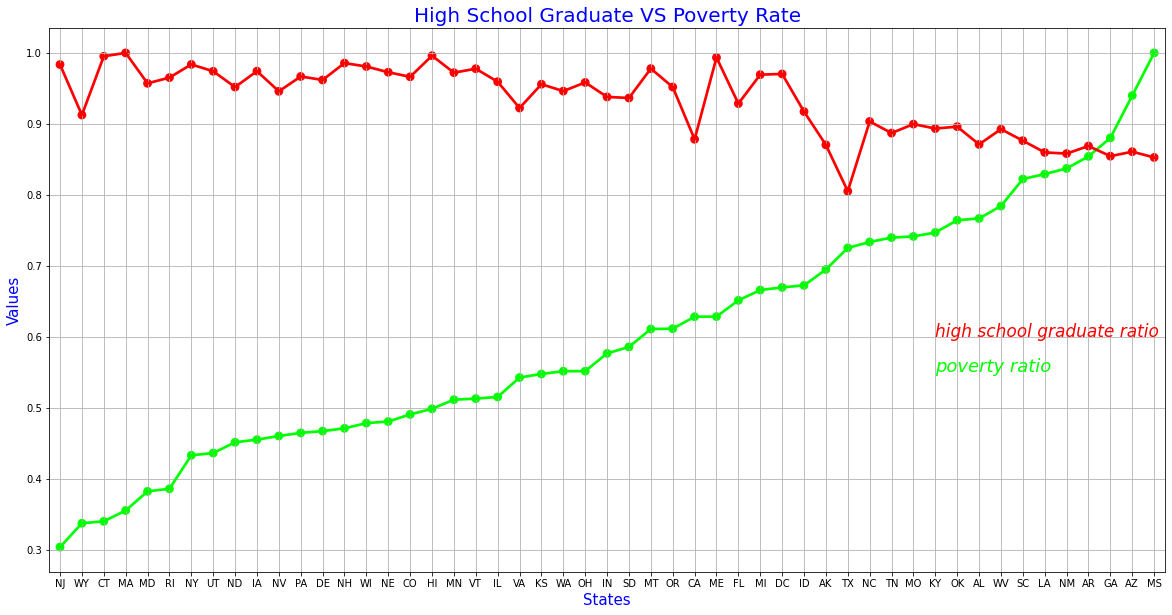

In [18]:
# high school graduation rate vs poverty rate of each state
sorted_data['area_poverty_ratio'] = sorted_data['area_poverty_ratio']/max(sorted_data['area_poverty_ratio'])
sorted_data2['area_highschool_ratio'] = sorted_data2['area_highschool_ratio']/max(sorted_data2['area_highschool_ratio'])
data = pd.concat([sorted_data, sorted_data2['area_highschool_ratio']], axis = 1)
data.sort_values('area_poverty_ratio', inplace = True)

# visualize
f, ax1 = plt.subplots(figsize = (20,10))
sns.pointplot(x = 'area_list', y = 'area_poverty_ratio', data = data, color = 'lime', alpha = 0.8)
sns.pointplot(x = 'area_list', y = 'area_highschool_ratio', data = data, color = 'red', alpha = 0.8)
plt.text(40, 0.6, 'high school graduate ratio', color = 'red', fontsize = 17, style = 'italic')
plt.text(40, 0.55, 'poverty ratio', color = 'lime', fontsize = 18, style = 'italic')
plt.xlabel('States', fontsize = 15, color = 'blue')
plt.ylabel('Values', fontsize = 15, color = 'blue')
plt.title('High School Graduate VS Poverty Rate', fontsize = 20, color = 'blue')
plt.grid()

<a id="3"></a>
## Joint Plot

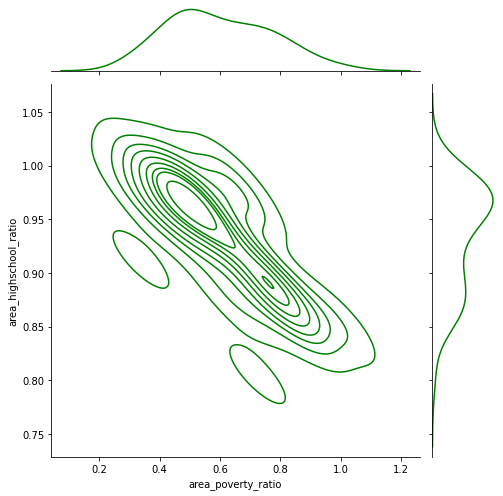

In [19]:
# Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code
# joint kernel density
# pearsonr= if it is 1, there is positive correlation and if it is, -1 there is negative correlation.
# If it is zero, there is no correlation between variables
# Show the joint distribution using kernel density estimation 
g = sns.jointplot(data.area_poverty_ratio, data.area_highschool_ratio, kind="kde", size=7, color = "green")
plt.savefig('graph.png')  # to show in kaggle
plt.show()

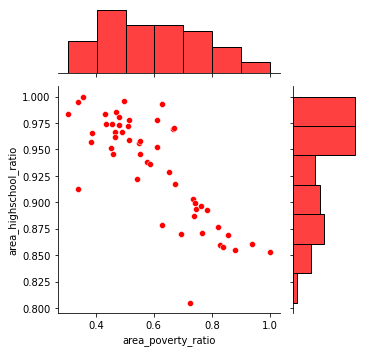

In [20]:
# you can change parameters of joint plot
# kind: { "scatter" | "reg" | "resid" | "kde" | "hex"}
# Different usage of parameters but same plot ith previous one
g = sns.jointplot("area_poverty_ratio", "area_highschool_ratio", data = data, size = 5, ratio = 3, color = "r")

<a id="4"></a>
## Pie Plot

In [21]:
kill.race.head()

0    A
1    W
2    H
3    W
4    H
Name: race, dtype: object

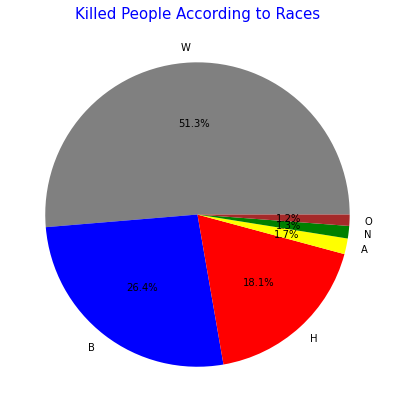

In [22]:
# Race rates according in kill data
kill.race.dropna(inplace = True)
labels = kill.race.value_counts().index
colors = ['grey', 'blue', 'red', 'yellow', 'green', 'brown']
explode = [0,0,0,0,0,0]
sizes = kill.race.value_counts().values

# visualization
plt.figure(figsize = (7,7))
plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct = '%1.1f%%')
plt.title('Killed People According to Races', color = 'blue', fontsize = 15)
plt.show()

<a id="5"></a>
## Lm Plot

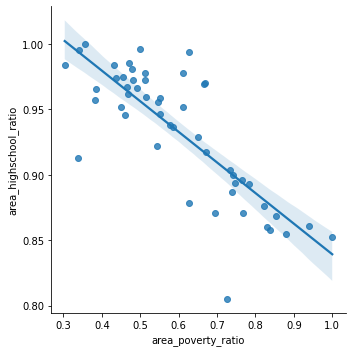

In [23]:
# Visualization of high school graduation rate vs poverty rate of each state with different style of seaborn code
# lmplot
# Show the results of a linear regression within each dataset
sns.lmplot(x = "area_poverty_ratio", y = "area_highschool_ratio", data = data)
plt.show()

<a id="6"></a>
## Kde Plot

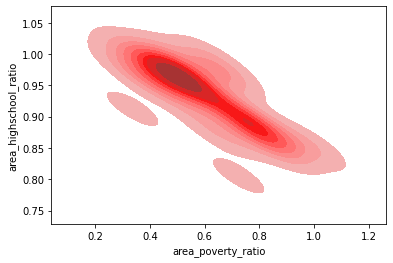

In [24]:
# Visualization of high school graduation rate vs poverty rate of each state with different style of seaborn code
# cubehelix plot
sns.kdeplot(data.area_poverty_ratio, data.area_highschool_ratio, shade = True, cut = 3, color = "r")
plt.show()

<a id="7"></a>
## Violin Plot

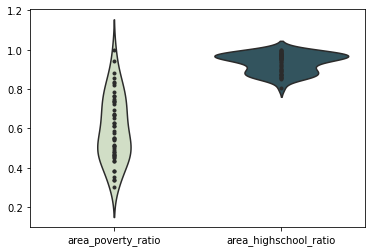

In [25]:
# Show each distribution with both violins and points
# Use cubehelix to get a custom sequential palette
pal = sns.cubehelix_palette(2, rot = -.5, dark = .3)
sns.violinplot(data = data, palette = pal, inner = "points")
plt.show()

<a id="8"></a>
## Heatmap

In [26]:
data.corr()

,area_poverty_ratio,area_highschool_ratio
area_poverty_ratio,1.000000,-0.805761
area_highschool_ratio,-0.805761,1.000000


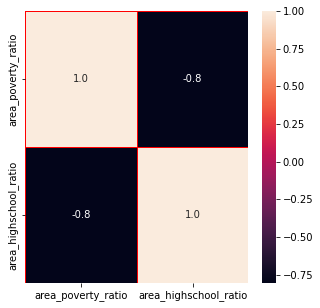

In [27]:
# Correlation map
# Visualization of high school graduation rate vs poverty rate of each state with different style of seaborn code
f, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(data.corr(), annot = True, linewidths = .5, linecolor = 'r', fmt = '.1f', ax = ax)
plt.show()

<a id="9"></a>
## Box Plot

In [28]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


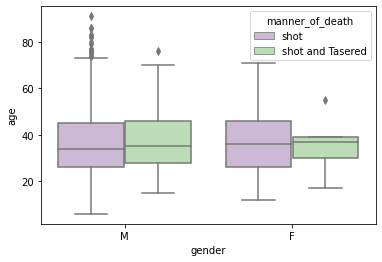

In [29]:
# Plot the orbital period with horizontal boxes
sns.boxplot(x = "gender", y = "age", hue = "manner_of_death", data = kill, palette = "PRGn")
plt.show()

<a id="10"></a>
## Swarm Plot

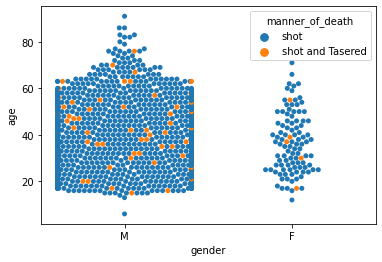

In [30]:
# swarm plot
sns.swarmplot(x = "gender", y = "age", hue = "manner_of_death", data = kill)
plt.show()

<a id="11"></a>
## Pair Plot

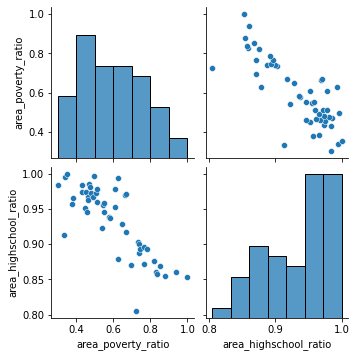

In [31]:
sns.pairplot(data)
plt.show()

<a id="12"></a>
## Count Plot

In [32]:
kill.manner_of_death.value_counts()

shot                2363
shot and Tasered     172
Name: manner_of_death, dtype: int64

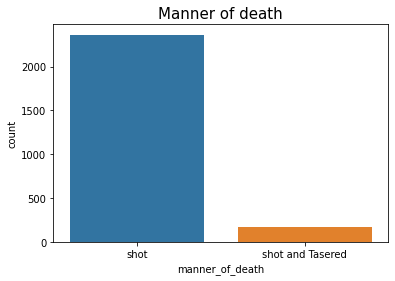

In [33]:
# kill properties
# Manner of death
sns.countplot(kill.manner_of_death)
plt.title('Manner of death', fontsize = 15)
plt.show()

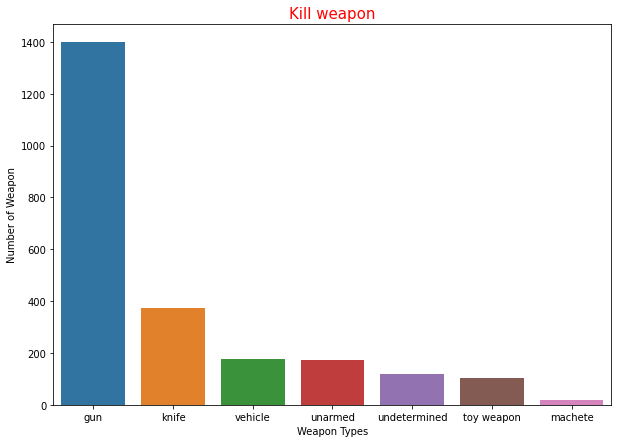

In [34]:
# weapon
armed = kill.armed.value_counts()
plt.figure(figsize = (10,7))
sns.barplot(x = armed[:7].index, y = armed[:7].values)
plt.ylabel('Number of Weapon')
plt.xlabel('Weapon Types')
plt.title('Kill weapon', color = 'red', fontsize = 15)
plt.show()

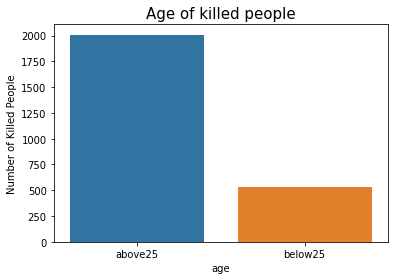

In [35]:
# age of killed people
above25 = ['above25' if i >= 25 else 'below25' for i in kill.age]
df = pd.DataFrame({'age': above25})
sns.countplot(x = df.age)
plt.ylabel('Number of Killed People')
plt.title('Age of killed people', fontsize = 15)
plt.show()

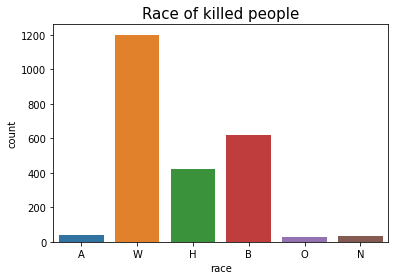

In [36]:
# Race of killed people
sns.countplot(data = kill, x = 'race')
plt.title('Race of killed people', fontsize = 15)
plt.show()